In [19]:
# https://gist.github.com/henryzord/eacc45c7b73d2cc1c26519cf94e7b271

import Orange  # pip install orange3
import matplotlib.pyplot as plt
import pandas as pd
import argparse
import numpy as np


def perform_checks(results_path: str) -> pd.DataFrame:
    df = pd.read_csv(results_path, index_col=0)

    if np.any(df > 0):
        raise ValueError("Result values should be negative (the smaller the value, the better). If that's not the case,"
                         "simply flip each value signal (e.g. 0.83 -> -0.83)")

    if not isinstance(df.index.dtype, object):
        raise TypeError("First column should have datasets names")

    return df


def main(results_path: str) -> None:
    df = perform_checks(results_path)

    n = len(df.index)  # number of datasets it was tested on
    names = df.columns  # names of methods

    # computes average ranks
    avranks = df.rank(axis=1).mean(axis=0).values

    cd = Orange.evaluation.scoring.compute_CD(avranks, n=n, alpha="0.05", test="nemenyi")
    Orange.evaluation.graph_ranks(
        avranks=avranks,
        names=names,
        cd=cd,
        width=6,
        textspace=1.5,
        # filename='./cd2.png'
    )
    plt.show()



In [20]:
data_file = "./../../data/processed/experiment_aucs.csv"

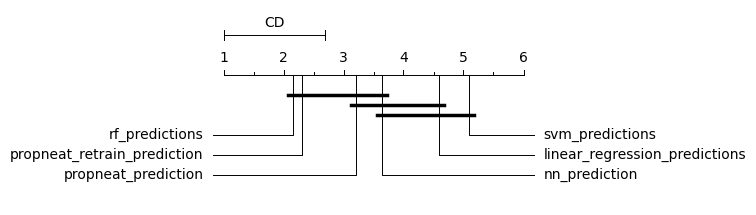

In [21]:
main(data_file)

In [4]:
data = pd.read_csv(data_file)

In [5]:
data

,dataset,linear_regression_predictions,nn_prediction,propneat_prediction,propneat_retrain_prediction,rf_predictions,svm_predictions
0,adult,-0.837900,-0.859552,-0.882427,-0.906021,-0.911533,-0.742864
1,agaricus_lepiota,-0.958178,-0.999045,-0.980006,-1.000000,-1.000000,-0.985063
2,breast_cancer,-0.733871,-0.737231,-0.769489,-0.825269,-0.822245,-0.500000
3,breast_cancer_wisconsin,-0.994268,-0.998824,-0.998530,-0.998383,-0.991770,-0.984127
4,breast_w,-0.996869,-0.996973,-0.997495,-0.996347,-0.994364,-0.963626
5,chess,-0.989615,-0.994718,-0.990561,-0.999465,-0.997211,-0.992717
6,churn,-0.830828,-0.686566,-0.873555,-0.914482,-0.916387,-0.768788
7,coil2000,-0.722904,-0.549721,-0.695690,-0.688897,-0.740757,-0.499673
8,colic,-0.870070,-0.884507,-0.878521,-0.883099,-0.862324,-0.818662
9,credit_a,-0.895220,-0.877976,-0.902905,-0.913777,-0.930881,-0.845127
